In [1]:
import pandas as pd
import numpy as np

## Timestamp

In [3]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

In [4]:
# what if want a time span instead of a single time point
# Period

## Period

In [5]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [6]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

## DateTimeIndex

In [8]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03') ])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [9]:
type(t1.index)

pandas.tseries.index.DatetimeIndex

## PeriodIndex

In [11]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [12]:
type(t2.index)

pandas.tseries.period.PeriodIndex

In [13]:
# Note different date formats in same series
d1 = ['2 June 2013', 'Aug 29 2014', '2015-06-26', '7/12/16']
ta3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ta3

,a,b
2 June 2013,37,69
Aug 29 2014,75,26
2015-06-26,36,66
7/12/16,27,35


In [14]:
# to uniform the dates use to_datetime

ta3.index = pd.to_datetime(ta3.index)
ta3

,a,b
2013-06-02,37,69
2014-08-29,75,26
2015-06-26,36,66
2016-07-12,27,35


In [17]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

## Timedeltas = differences in time

In [19]:
# Whats between the following dates
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [21]:
# 12 days and 3 hours
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

## Working with Dates in a DataFrame

In [22]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [24]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,103,118
2016-10-16,101,118
2016-10-30,104,122
2016-11-13,100,126
2016-11-27,97,118
2016-12-11,104,129
2016-12-25,109,121
2017-01-08,108,129
2017-01-22,103,120


In [25]:
# we can check what day of the week every date is
df.index.weekday_name

array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

In [26]:
# to find the difference between each dates value
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,-2.0,0.0
2016-10-30,3.0,4.0
2016-11-13,-4.0,4.0
2016-11-27,-3.0,-8.0
2016-12-11,7.0,11.0
2016-12-25,5.0,-8.0
2017-01-08,-1.0,8.0
2017-01-22,-5.0,-9.0


In [27]:
# find the mean count in each dataframe
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,102.666667,119.333333
2016-11-30,98.500000,122.000000
2016-12-31,106.500000,125.000000
2017-01-31,105.500000,124.500000


In [28]:
df['2017']

,Count 1,Count 2
2017-01-08,108,129
2017-01-22,103,120


In [29]:
df['2016-12'] 

,Count 1,Count 2
2016-12-11,104,129
2016-12-25,109,121


In [30]:
df['2016-12':] # December 2016 onwards

,Count 1,Count 2
2016-12-11,104,129
2016-12-25,109,121
2017-01-08,108,129
2017-01-22,103,120


In [35]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,103,118
2016-10-09,103,118
2016-10-16,101,118
2016-10-23,101,118
2016-10-30,104,122
2016-11-06,104,122
2016-11-13,100,126
2016-11-20,100,126
2016-11-27,97,118
2016-12-04,97,118


## Plotting Time Series

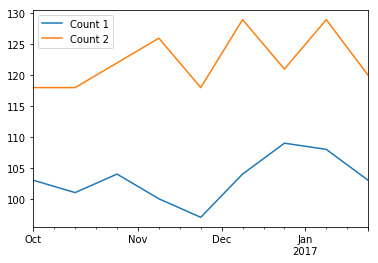

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()